In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import json
import requests
from functools import reduce

from functools import reduce
import yfinance as yf

import datetime as dt
from datetime import datetime, date, time, timedelta
from dateutil.relativedelta import relativedelta

# Import PlotLy Dependencies
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [39]:
# Run this for data source functions
%run yahoo_finance_data.ipynb

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Stored 'one_day_X' (ndarray)
Stored 'one_day_y' (ndarray)
Stored 'five_day_X' (ndarray)
Stored 'five_day_y' (ndarray)
Stored 'ten_day_X' (ndarray)
Stored 'ten_day_y' (ndarray)
Stored 'thirty_day_X' (ndarray)
Stored 'thirty_day_y' (ndarray)
Stored 'rate_forecast_df' (DataFrame)


In [71]:
rate_forecast_df.describe()

,Date,Mortgage Backed Securities Adj Close,20+ Yr Treasuries Adj Close,7-10 Yr Treasuries Adj Close,Gold Adj Close,Volatility Index Adj Close,10-Yr Treasury Yield Adj Close
count,4217,4217.000000,4217.000000,4217.000000,4217.000000,4217.000000,4217.000000
mean,2015-08-01 05:48:38.757410304,86.293349,96.212480,87.823495,131.783537,20.218945,2.603222
min,2007-03-16 00:00:00,61.547028,50.759277,54.144058,63.619999,9.140000,0.499000
25%,2011-05-23 00:00:00,80.236115,74.019814,76.649078,113.809998,14.020000,1.890000
50%,2015-07-31 00:00:00,88.702477,97.742813,90.989449,125.419998,17.850000,2.505000
75%,2019-10-10 00:00:00,92.228058,109.226608,96.102219,161.490005,23.430000,3.334000
max,2023-12-18 00:00:00,103.252098,158.691483,115.944794,193.889999,82.690002,5.248000
std,NaN,10.571895,25.529456,14.914123,31.108741,9.138440,0.969280


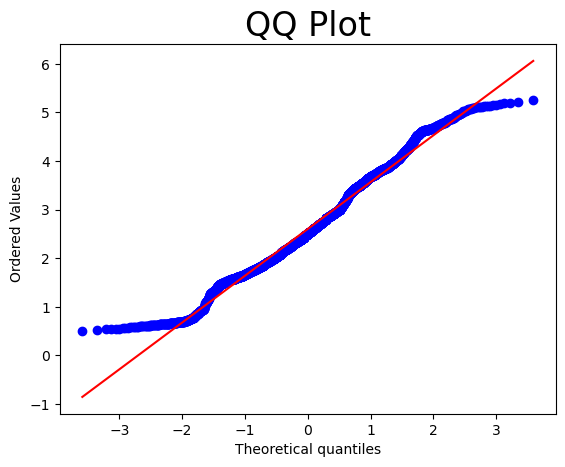

In [76]:
import scipy.stats
import pylab

scipy.stats.probplot(rate_forecast_df["10-Yr Treasury Yield Adj Close"], plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

In [44]:
five_day_X = rate_forecast_df.iloc[:-5, 1:-5].values
five_day_X

array([[ 62.71498108,  54.76104736,  56.17737961,  64.62000275,
         16.79000092],
       [ 62.71498108,  54.64527512,  56.10346222,  64.73999786,
         14.59000015],
       [ 62.78956985,  54.67573166,  56.18414688,  65.26999664,
         13.27000046],
       ...,
       [ 91.68752289,  95.01387787,  94.28094482, 188.1499939 ,
         13.06000042],
       [ 91.30865479,  94.23638916,  93.67274475, 185.63999939,
         12.35000038],
       [ 91.34854126,  94.03702545,  93.682724  , 183.58999634,
         12.63000011]])

In [60]:
# rate_forecast_df.head()

In [63]:
five_day_y = rate_forecast_df.iloc[:-5, 8:9].values
five_day_y

array([[4.61299991607666],
       [4.586999893188477],
       [4.611999988555908],
       ...,
       [3.930000066757202],
       [3.927999973297119],
       [3.952000141143799]], dtype=object)

### Linear Regression

In [64]:
# Split data into Train/Test Data. 80% of it will be used for "training" the model. The other 20% will be used for testing.
X_train = five_day_X[:80]
X_test = five_day_X[80:]

y_train = five_day_y[:80]
y_test = five_day_y[80:]

In [65]:
y_test

array([[5.010000228881836],
       [5.0279998779296875],
       [4.955999851226807],
       ...,
       [3.930000066757202],
       [3.927999973297119],
       [3.952000141143799]], dtype=object)

In [66]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train_scaled, y_train_scaled)

score = model.score(X_test_scaled, y_test_scaled)
print(f"R2 Score: {score}")

R2 Score: -69.88244460991186


In [68]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[ 1.05720936  0.38146345 -2.0969245  -0.17921294  0.14194647]]
y-axis intercept:  [1.11122281e-14]


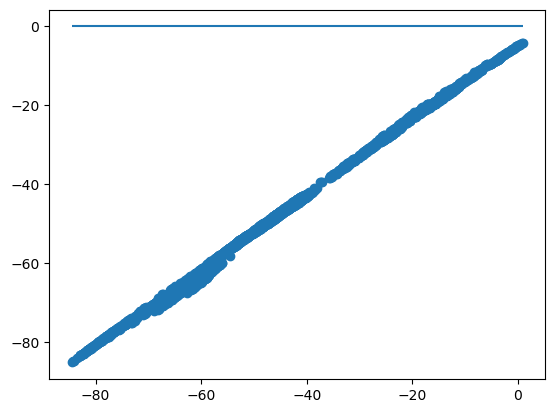

In [69]:
predictions = model.predict(X_test_scaled)
# Plot Residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [70]:
# Actual value = 3.96 as of 12/18/2023
new_data = [[91.348541, 94.037025, 93.682724, 460.124451, 363.876282, 183.589996, 12.630000]]

scaled_new_data = X_scaler.transform(new_data)

new_prediction = model.predict(scaled_new_data)
new_prediction

ValueError: X has 7 features, but StandardScaler is expecting 5 features as input.

In [26]:
scaled_new_data

array([[ 73.19608846,  38.79708249,  64.57882982, 122.11094014,
         83.73644738,  92.4296289 ,  -0.93428998]])

###### Using PCA Variables

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5, whiten=True).fit(five_day_X)
five_day_X_pca = pca.transform(five_day_X)

In [ ]:
print(pca.components_)

In [ ]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

In [ ]:
from sklearn.linear_model import LinearRegression
model_pca = LinearRegression()

# Fitting our model with all of our features in X
model_pca.fit(five_day_X_pca, five_day_y)

score_pca = model_pca.score(five_day_X_pca, five_day_y)
print(f"R2 Score: {score_pca}")

In [ ]:
predictions_pca = model_pca.predict(five_day_X_pca)
# Plot Residuals
plt.scatter(predictions_pca, predictions_pca - five_day_y)
plt.hlines(y=0, xmin=predictions_pca.min(), xmax=predictions_pca.max())
plt.show()

In [ ]:
new_data_pca = PCA(n_components=5, whiten=True).fit(five_day_X)
new_data_X_pca = new_data_pca.transform(new_data)

In [ ]:
pca_prediction = model_pca.predict(new_data_X_pca)
pca_prediction

### Support Vector Machine

In [ ]:
# Split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(five_day_X, five_day_y, random_state=1, test_size=0.2)
print(five_day_X.shape, five_day_y.shape)

In [ ]:
X_train

In [ ]:
# Import the Support Vector Regressor
from sklearn.svm import SVR 

# Fit to the training data and validate with the test data
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [ ]:
# Model Accuracy
print('Test Acc: %.3f' % svm_model.score(X_test, y_test))

In [ ]:
y_test

In [ ]:
svm_prediction = svm_model.predict(new_data)
svm_prediction

In [ ]:
d = [[91.308655, 94.236389, 93.672745, 460.200012, 363.119995, 185.639999, 12.350000, 4.245]]
p = svm_model.predict(d)
p